#     ANALYSIS OF THE ISRAELI-PALESTINIAN CONFLICT

## Introduction

This project analyses kaggle.com's database on the Israel-Palestine conflict. Specifically, the information collected in this dataset is the number of people killed in the war from 2000 to 2023.

I want to emphasise my aversion to war and any kind of warlike confrontation. This is a purely objective analysis. The objective is to expose the number of casualties in this particular war, the age of these casualties, where they have taken place and their nationality.



## Scoping

It is good for the project to have a previous basis of how it is going to be developed, it facilitates the work, it generates a previous mental scheme for both the analyst and the reader that will help understanding and drawing conclusions.
For this project, the first section will be to determine the objectives and intentions in order to know how to approach the database. The second section is the data, which fortunately we have a database with more than 10,000 entries that fit our objectives. The third section is about the analysis of the data in which we will use methods that will give an answer to the set objectives. And finally, the fourth section is the evaluation, in which we will draw conclusions through machine learning.


### Project Goals

Through mathematics, statistics and applying machine learning and deep learning methods, we will try to achieve these objectives and answer these questions:

    - Which are the places with the highest fatality rate?
    - Are there any common characteristics among the deceased?
    - Have there been periods of peace or de-escalation of tension over the years?
 




 

### Data

The project has one data set called  "Fatalities in the Israeli-Palestinian" taken from kaggle.com's database. In the data, each row represent a person and each column a feature.

### Analysis

This solution will use descriptive statistic and data visualization to find key figures in understanding the distribution, count and relationship between variables. Since one of the goals of the project is to make predictions of whether or not certain characteristics make you more likely to die, classification algorithms from the supervised learning family of machine learning models will be implemented.

### Conclusion

The study will culminate in a review of the statistical findings, leading to the formulation of conclusions. The aim of this section is to provide impartial resolutions to the initial research inquiries based solely on the gathered data.

## Import Python Modules

In [11]:
# We import general libraries
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt


 ## Loading the Data

For analyzing the dataset we have to load it first using pandas. Our .csv file is called `fatalities_isr_pse_00_23.csv` and it's loaded into a `DataFrame` called `fatalities`. The `DataFrame` is briefly examined using the `.head()` funtcion.

In [12]:
# Using panda we load the .csv into a variable called fatalities
fatalities = pd.read_csv("C:\\Users\\rodri.DESKTOP-RAT8004\\Desktop\\Palestine_Israel_Analysis\\fatalities_isr_pse_00_23.csv")
fatalities.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


Now we examine the type object of each feature in `fatalities` to see if there is an error. We also want to know if the `Nan` values in the `took_part_in_the_hostilities` column mean that they didn't take part, or that we don't know if they did.

In [13]:
# We use dtypes, shape and describe to continue analyzing the DataFrame.
print(fatalities.shape)

(11124, 16)


We have 11124 rows of data in `fatalities` and 16 different columns describing the characteristics of each row. We will select only those that are key arguments for the goals of the project.

In [14]:
# We check each column data type
print(fatalities.dtypes)

name                             object
date_of_event                    object
age                             float64
citizenship                      object
event_location                   object
event_location_district          object
event_location_region            object
date_of_death                    object
gender                           object
took_part_in_the_hostilities     object
place_of_residence               object
place_of_residence_district      object
type_of_injury                   object
ammunition                       object
killed_by                        object
notes                            object
dtype: object


In summary, the average age of the deceased is around 26 years, with the youngest being 1 year old and the oldest 112 years old. It will be necessary to check if there are unfilled data cells that could be altering these figures, but for now they seem to be data that could be realistic.

In [15]:
# We use .count() to check which columns have NaN values in order to clean and prapre the data for further steps.
print(fatalities.count())

name                            11124
date_of_event                   11124
age                             10995
citizenship                     11124
event_location                  11124
event_location_district         11124
event_location_region           11124
date_of_death                   11124
gender                          11104
took_part_in_the_hostilities     9694
place_of_residence              11056
place_of_residence_district     11056
type_of_injury                  10833
ammunition                       5871
killed_by                       11124
notes                           10844
dtype: int64


We can see that there are columns with no missing data and others such as `age`, `ammunition` or `took_part_in_hostilities` that have many `NaN` values. This can be a problem when studying a database if it is not cleaned first. So we need to clean the database before we can do any analysis. 
Fortunately, many of these columns will not be needed for our project, so we can delete them.

In [16]:
# We have a look a the columns so we know which one we can delete
print("******************Columns******************")
for idx, col in enumerate(fatalities.columns, start=1):
    print(f"{idx}: {col}")


******************Columns******************
1: name
2: date_of_event
3: age
4: citizenship
5: event_location
6: event_location_district
7: event_location_region
8: date_of_death
9: gender
10: took_part_in_the_hostilities
11: place_of_residence
12: place_of_residence_district
13: type_of_injury
14: ammunition
15: killed_by
16: notes


## Cleaning the Data

As our objectives are related with fatalities, location, time and personal characteristics we can delete all the columns that are not related to our objectives. In this case we are going to keep `name`, `date_of_event`, `age`, `citizienship`, `event_location`,`event_location_district`, `event_location_region`, `gender` and `took_part_in_the_hostilities`. And we will remove the others.

In [17]:
# Flatten the index and drop the unnecessary columns 
fatalities.columns = fatalities.columns.to_flat_index()
fatalities=fatalities.drop(["place_of_residence",
                         "place_of_residence",
                         "place_of_residence_district",
                         "type_of_injury",
                         "date_of_death",
                         "ammunition",
                         "killed_by",
                         "notes"], 
                         axis=1)

After we dropped the unnecessary columns we want to clean up the DataFrame so that the information is easy to see and there are no repeated data, NaN values, redundancy, etc. 

Now we are going to merge `event_location_district` and `event_location_region` into one, we don't want them to take up so much space and we want to collect all the information in one column. The `event_location` has 494 distinct records and is too specific for the analysis we want to do as it determines the specific location where it occurred.

In [18]:
# Number of unique values for event_location column
fatalities.event_location.nunique()

# We drop the column now so we can name the new merged column as event_location
fatalities = fatalities.drop(["event_location"], axis=1)

In [19]:
# We use .cat to merge both event_location_district and event_location_region into a new column called event_location
fatalities['event_location'] = fatalities.event_location_district.str.cat(fatalities.event_location_region, sep=', ')

# And we drop the old columns to keep the DataFrame as clean as possible
fatalities = fatalities.drop(["event_location_district", 
                              "event_location_region"], 
                             axis=1)

Now we will adjust two values within the `hostile` column. As this is not a binary column, we do not want it to have `Yes` and `No` as options. Instead, we will replace them with `Hostile` and `Civil`.

In [20]:
# Change values in column names 
fatalities = fatalities.replace("Yes", "Hostile")
fatalities = fatalities.replace("No", "Civilian")

We still have some missing values in `Age` and `Gender` values. On the one hand, the `Gender` column we can set them to `Unknown` or we can delete the row in order to keep the DataFrame clean as there are only 20 values and it won't change the result of the analysis. On the other hand, with the `Age` column

In [21]:
# Calculate the average age to fill Nan values with the mean
mean_age = fatalities.age.mean()
fatalities["age"] = fatalities.age.fillna(mean_age)
# We drop 20 rows of Nan values in order to have the DataFrame clean
fatalities = fatalities.dropna()
fatalities.isnull().sum()

name                            0
date_of_event                   0
age                             0
citizenship                     0
gender                          0
took_part_in_the_hostilities    0
event_location                  0
dtype: int64

We are almost finished cleaning the data. Finally we want to change the `NaN` values from the `took_part_in_hostilities` to `Unknown` and rename the columns so they don't take so much space and give the same information.

In [22]:
# Change ever NaN value to Unknown
fatalities.took_part_in_the_hostilities = fatalities.took_part_in_the_hostilities.fillna("Unknown")

# Rename date_of_event took_part_in_the_hostilities and event_location
fatalities = fatalities.rename(columns={"date_of_event" : "date", 
                                "took_part_in_the_hostilities" : "hostile", 
                                "event_location" : "location"})

In [23]:
fatalities.head()

,name,date,age,citizenship,gender,hostile,location
6,Yusef Salem Yusef Radwan,2023-09-19,24.0,Palestinian,M,Civilian,"Gaza, Gaza Strip"
94,Iyad al-'Abed al-Hasani,2023-05-12,51.0,Palestinian,M,Hostile,"Gaza, Gaza Strip"
95,Muhammad Walid Muhammad 'Abd al-'Aal,2023-05-12,33.0,Palestinian,M,Hostile,"Gaza, Gaza Strip"
96,'Ali Hassan Muhammad Ghali,2023-05-11,49.0,Palestinian,M,Hostile,"Khan Yunis, Gaza Strip"
98,Mahmoud Walid Mahmoud 'Abd al-Jawad,2023-05-11,25.0,Palestinian,M,Hostile,"Khan Yunis, Gaza Strip"


Now that the data is clean and organized we print `.head()` to check the results. We will continue with further steps to achieve our goals, it's time to analyze the data using statistics and maths.

## Analysis

In order to maintain the right focus and continue to take steps towards achieving our objectives, we are going to perform some statistical analysis and graphically explore the DataFrame to see how the data behaves and what first impressions we can draw.

In [24]:
# Let's check when the first and the last data of this dataset were collected
print(f"The first data collected was in: {fatalities.date.min()}")
print(f"The last data collected was in: {fatalities.date.max()}")

The first data collected was in: 2000-10-02
The last data collected was in: 2023-09-19


### Deaths per Year

Let's start with some graphs to begin to solve some of our objectives. In this case we look at deaths per year from 2000 to 2023.  We can see a couple of de-escalation periods between 2010-2013 and 2015-2020. In no case do the deaths reach 0 so we cannot say that there has been any moment of peace in all these years.

In [25]:
fatalities['date'] = pd.to_datetime(fatalities['date'])

deaths_year = fatalities.value_counts(fatalities.date.dt.year)

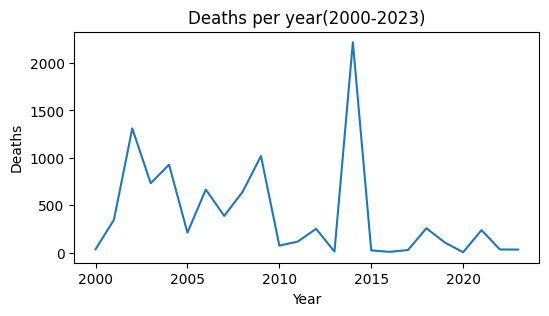

In [26]:
plt.figure(figsize=(6, 3))
sns.lineplot(data=deaths_year)
plt.title("Deaths per year(2000-2023)")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()

### Gender Comparision

Also relevant to an analysis of social characteristics is the gender distribution. Historically, the majority of individuals involved in warfare were men. It remains to be seen whether this trend persists in the present conflict or if there has been a shift.

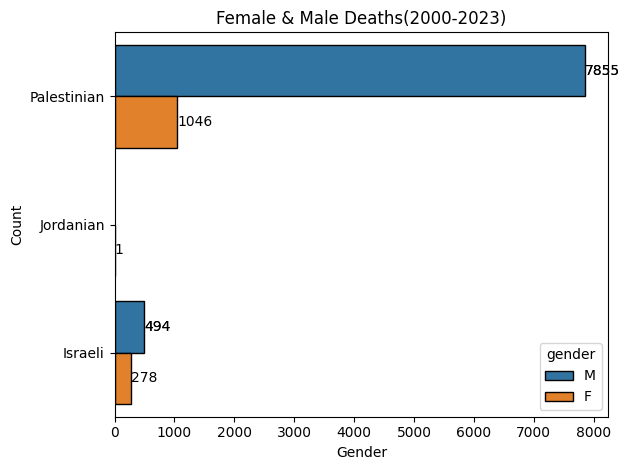

In [38]:
fig = sns.countplot(data=fatalities, y="citizenship", hue="gender", alpha=1, edgecolor="black")
fig.bar_label(fig.containers[0])
plt.title("Female & Male Deaths(2000-2023)")
lst= list(range(0,2))
for i in range(len(lst)):
    fig.bar_label(fig.containers[i])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Hardest hit locations

The Israeli-Palestinian conflict is taking place on land between Israel and Palestine, but mainly on Palestinian land, with the two most affected locations being the 'Gaza Strip' and the 'West Bank'. Gaza City is by far the most affected.

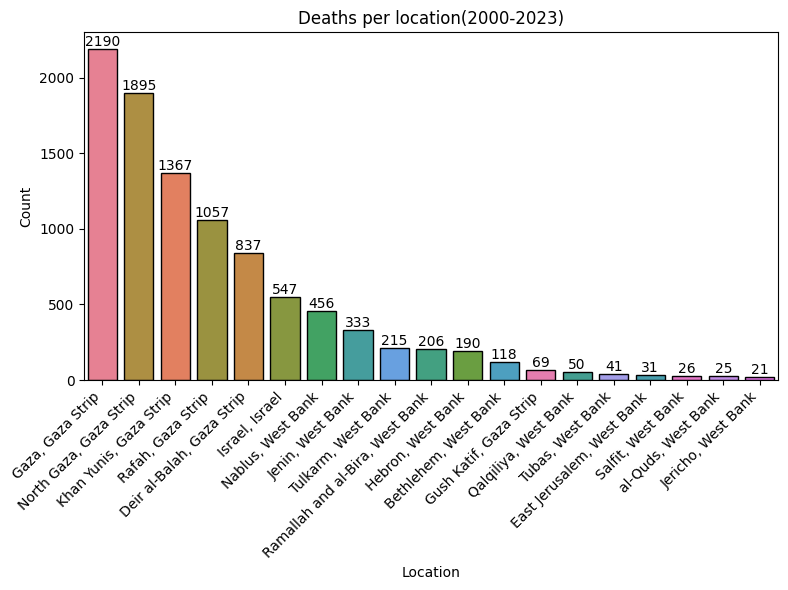

In [30]:
# Plot every location ordered by the number of deaths in each area.
plt.figure(figsize=(8,6))
fig = sns.countplot(fatalities, 
                    x="location", hue="location", 
                    order = fatalities['location'].value_counts().index,
                    edgecolor="black")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')
lst= list(range(0,19))
for i in range(len(lst)):
    fig.bar_label(fig.containers[i])

plt.title("Deaths per location(2000-2023)")
plt.xlabel("Location")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Victim type

In a conflict such as this one, where cities full of civilians are affected, it is crucial to evaluate whether individuals outside the war are experiencing the aftermath of a war they did not initiate or select. Initially, we understand that they are. However, we are now able to observe that the highest number of victims are `Civilian`, significantly surpassing the second-largest group, `Hostile`. 

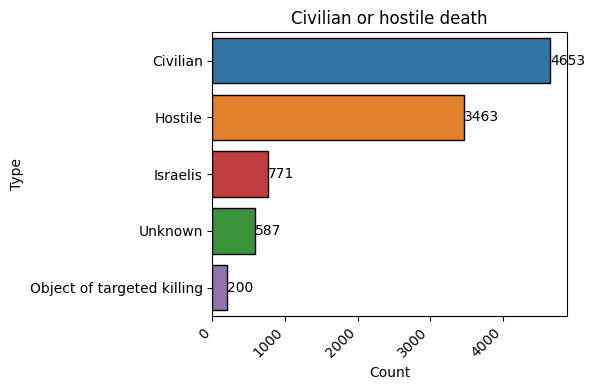

In [33]:
# Plot hostile column
plt.figure(figsize=(6,4))
fig = sns.countplot(fatalities, 
                    y="hostile",
                    hue="hostile",
                    order = fatalities['hostile'].value_counts().index,
                    edgecolor="black")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')
lst= list(range(0,5))
for i in range(len(lst)):
    fig.bar_label(fig.containers[i])
plt.title("Civilian or hostile death")
plt.xlabel("Count")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

### Age Analysis

During times of war, there are often numerous casualties, with a disproportionate number being middle-aged men of fighting age. However, in cases where the majority of fatalities are civilians, it is unclear how this impacts the age demographic of those who have perished.

In [76]:
# We calculate the mean, the median and the mode of the dataset
mean_age = fatalities.age.mean()
median_age = fatalities.age.median()
modal_age = pd.Series(fatalities["age"].values.flatten()).mode()[0]
print(f"The average age of the deceased is: {mean_age}", 
      f"\nThe median age of the deceased is: {median_age}", 
      f"\nThe modal age of the deceased is: {modal_age}")

The average age of the deceased is: 26.745702592087316 
The median age of the deceased is: 23.0 
The modal age of the deceased is: 22.0


We studied whether there is a relationship between `Age` and `Date` to find out if during this period of time there has been any particular distribution or if there is any age group that has been more involved in the war. 

As can be observed, during the initial stages of the war, the majority of individuals within the data were aged between 16 and 40 years. In the subsequent years of the war, the age range was approximately 16 to 30 years.

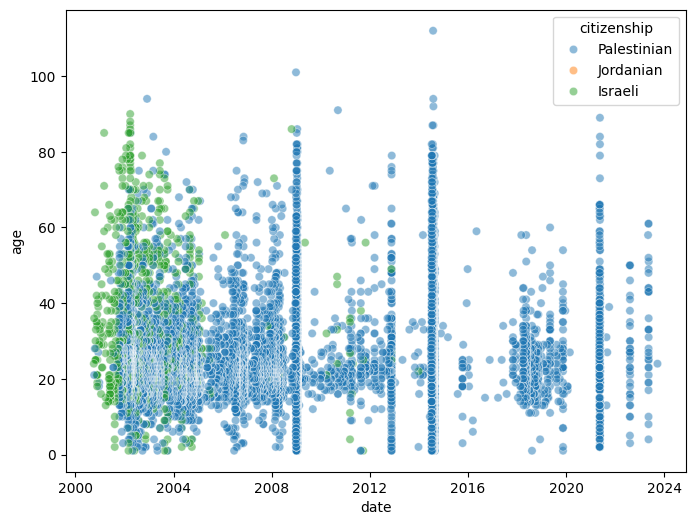

In [39]:
# We use sns.scatterplot to study the relationship between two varaibles
plt.figure(figsize=(8,6))
sns.scatterplot(fatalities, x="date", y="age", alpha=0.5, hue="citizenship")
plt.show()

## Conclusion

### General Comments

The first point to consider is that the reliability of data collected in this dataset remains uncertain, and their official sources and potential biases remain unknown. Therefore, these conclusions should be regarded as a practical exercise for analysis rather than as a trustworthy source.

Our research and analysis process has successfully answered the questions initially posed, which were as follows: 

####  Which are the places with the highest fatality rate?

Gaza City, which includes Gaza and North Gaza in the dataset, has by far the highest fatality rate in the area, being 300% higher than the next region.  The Gaza Strip area is also in the top 5, with Israel ranking in 6th place. However, upon further regional analysis, the West Bank as a whole exhibits a higher fatality rate than Israel.

####  Are there any common characteristics among the deceased?


There are some common trends among those who have passed away, although they lack a broad range of information such as their profession, education and economic status. However, we do have access to other data to work with.

Within this specific instance, we have focussed our research on `age`, `gender`, type of participation during the war(`hostile`) and `citizenship`.

In terms of nationality, Palestinians have experienced the highest number of casualties, exceeding all other nationalities by more than 10 times. It appears evident that they are enduring the greatest suffering from the conflict, even though there have been a significant number of Israeli deaths.

However, the dataset lacks differentiation between civilian and military Israelis, thus analysis with regard to this characteristic is not viable.
Nevertheless, analysis can be conducted for the Palestinians, with 52.27% of the population being identified as civilian casualties and 38.9% being identified as hostile. Furthermore, these percentages do not include casualties that do not have a known relation to the war and military targets that were intentionally killed.

#### Have there been periods of peace or de-escalation of tension over the years?

Finally, we wanted to know how the war has developed over the years and whether it has always been as active and violent as it is now. But if we look at the evolution of the war, we see that there have been periods of de-escalation and hardly any violence or fatalities. It is true that they have not lasted very long but it was not such an excessive war as it is now (these data are not included in the dataset since the event that triggered this de-escalation was an attack by Hamas on 7 October 2023).

Finally, our inquiry pertained to the evolution of the war over time and whether its current combative and aggressive nature is a recent development. However, upon examining its progression, we can observe that there have been periods of de-escalation and minimal incidences of violence or casualties. It is true that the conflict was not long-lasting, but it was not as severe as its current state (these specific data points were not included in the dataset as the de-escalation was prompted by a Hamas attack on 7 October 2023).

Periods of almost complete inactivity were witnessed between 2015 and 2017, followed by a short dormant phase in 2020 - likely due to Covid-19. From mid-2021 till the present, there has been a resurgence, although the reported fatalities are not comparable to the current situation or the previous occurrences.

#### Future projection

To conclude this analysis, it is difficult to project the future of the war given the many social, ideological, cultural and economic nuances. However, we can assume that some periods of decreased tension will occur following this period of conflict. To conclude this analysis, it is difficult to project the future of the war given the many social, ideological, cultural and economic nuances. There is potential for a reduction in the conflict and ideally, resolution in the most peaceful manner. However, the situation is challenging and solutions may be difficult to achieve.